In [1]:
import functions as bv
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Get the data to train  
#### Make sure to run label_data first if you are adding data
Label for training. Split into training, validation, and testing sets to achieve accuracy of predictions.

In [2]:
all_wells = np.load('training_data/wells.npy')
all_labels = np.load('training_data/labels.npy')
# Normalize the data to be in range [0-1]
images = np.array(all_wells) / 255.0  # Normalize images to [0, 1]
labels = np.array(all_labels)
# Split the data into training and validation sets, using small amount of data rn.
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Save data, can use to train multiple models, compare outputs.
np.save('saved/X_train.npy', X_train)
np.save('saved/X_val.npy', X_val)
np.save('saved/y_train.npy', y_train)
np.save('saved/y_val.npy', y_val)

### Create the model that we will feed training data

In [17]:
# Example usage with RGB images
input_shape_rgb = (50, 50, 3)
model = bv.create_model(input_shape_rgb)
# model.summary()

# Train the model with more data augmentation
# This includes rotations, shifts, and flips of the images
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True
# )

# datagen.fit(X_train)

##### View the accuracy on test and validation accuracy of the model. If the results are undesirable, run again, the data splitting is random. (IE if a bunch of frozen wells end up in the training set it won't know which wells are glass)

In [19]:
# Load data
X_train = np.load('saved/X_train.npy')
X_val = np.load('saved/X_val.npy')
y_train = np.load('saved/y_train.npy') - 1 # -1 to convert labels to 0, 1, 2 since 1,2,3 means we would have to set 4 classes
y_val = np.load('saved/y_val.npy') - 1

# Convert labels to categorical format (one hot encoding, very important)
y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
# print(y_train[:20]) # uncomment this if you want to see the labels in one hot encoding

# Train the model
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), callbacks=[
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
])


Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8534 - loss: 0.3476 - val_accuracy: 0.9375 - val_loss: 0.2434
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8542 - loss: 0.3326 - val_accuracy: 0.9583 - val_loss: 0.2608
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.8950 - loss: 0.3062 - val_accuracy: 0.9479 - val_loss: 0.2575
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8968 - loss: 0.2836 - val_accuracy: 0.9479 - val_loss: 0.2590


## Load the model, test on a new image

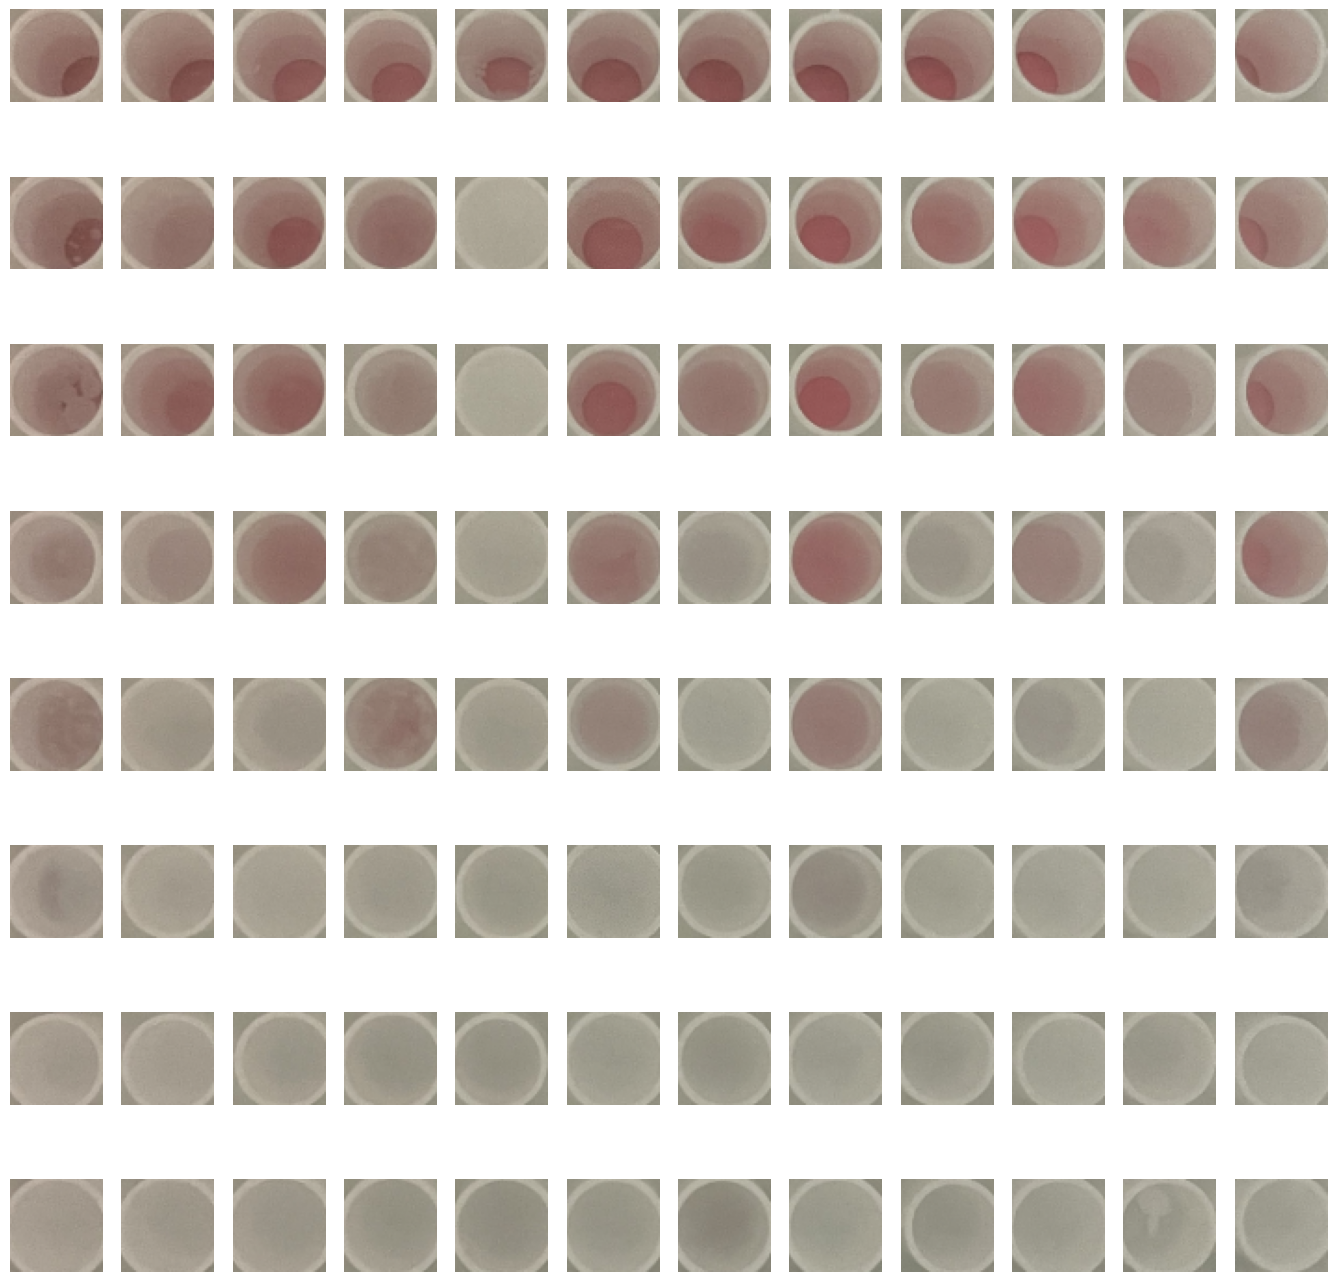

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0.5,	0.5
1,	0.5,	1,	0.5,	0,	1,	1,	1,	0.5,	1,	0.5,	0.5
0.5,	1,	1,	0.5,	0,	1,	0.5,	1,	0.5,	0.5,	0,	0.5
0.5,	0,	0.5,	0.5,	0,	0.5,	0,	1,	0,	0.5,	0,	0.5
0.5,	0,	0,	0.5,	0,	0,	0,	0.5,	0,	0,	0,	0
0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0
0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0
0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0


In [20]:
bv.label_wells('IMG_1550.jpg', 'best_model.keras')